In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import OneHotEncoder

In [2]:
data = pd.read_csv('../raw_data/hospital_readmissions.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   age                25000 non-null  object
 1   time_in_hospital   25000 non-null  int64 
 2   n_lab_procedures   25000 non-null  int64 
 3   n_procedures       25000 non-null  int64 
 4   n_medications      25000 non-null  int64 
 5   n_outpatient       25000 non-null  int64 
 6   n_inpatient        25000 non-null  int64 
 7   n_emergency        25000 non-null  int64 
 8   medical_specialty  25000 non-null  object
 9   diag_1             25000 non-null  object
 10  diag_2             25000 non-null  object
 11  diag_3             25000 non-null  object
 12  glucose_test       25000 non-null  object
 13  A1Ctest            25000 non-null  object
 14  change             25000 non-null  object
 15  diabetes_med       25000 non-null  object
 16  readmitted         25000 non-null  objec

### Checking for duplicates

In [4]:
data.duplicated().sum()

0

### Checking for missing data

In [5]:
data.isnull().sum().sort_values(ascending=False)/len(data)

age                  0.0
time_in_hospital     0.0
n_lab_procedures     0.0
n_procedures         0.0
n_medications        0.0
n_outpatient         0.0
n_inpatient          0.0
n_emergency          0.0
medical_specialty    0.0
diag_1               0.0
diag_2               0.0
diag_3               0.0
glucose_test         0.0
A1Ctest              0.0
change               0.0
diabetes_med         0.0
readmitted           0.0
dtype: float64

### age

In [6]:
data['age'].unique()

array(['[70-80)', '[50-60)', '[60-70)', '[40-50)', '[80-90)', '[90-100)'],
      dtype=object)

In [7]:
# Instantiate the OneHotEncoder
ohe = OneHotEncoder(sparse_output = False) 

# Fit encoder
ohe.fit(data[['age']]) 

# Transform the current "age" column
data[ohe.get_feature_names_out()] = ohe.transform(data[['age']])

# Drop the column "age" which has been encoded
data = data.drop(columns = ["age"])

# Show the dataset
data.head(3)

,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency,medical_specialty,diag_1,diag_2,...,A1Ctest,change,diabetes_med,readmitted,age_[40-50),age_[50-60),age_[60-70),age_[70-80),age_[80-90),age_[90-100)
0,8,72,1,18,2,0,0,Missing,Circulatory,Respiratory,...,no,no,yes,no,0.0,0.0,0.0,1.0,0.0,0.0
1,3,34,2,13,0,0,0,Other,Other,Other,...,no,no,yes,no,0.0,0.0,0.0,1.0,0.0,0.0
2,5,45,0,18,0,0,0,Missing,Circulatory,Circulatory,...,no,yes,yes,yes,0.0,1.0,0.0,0.0,0.0,0.0


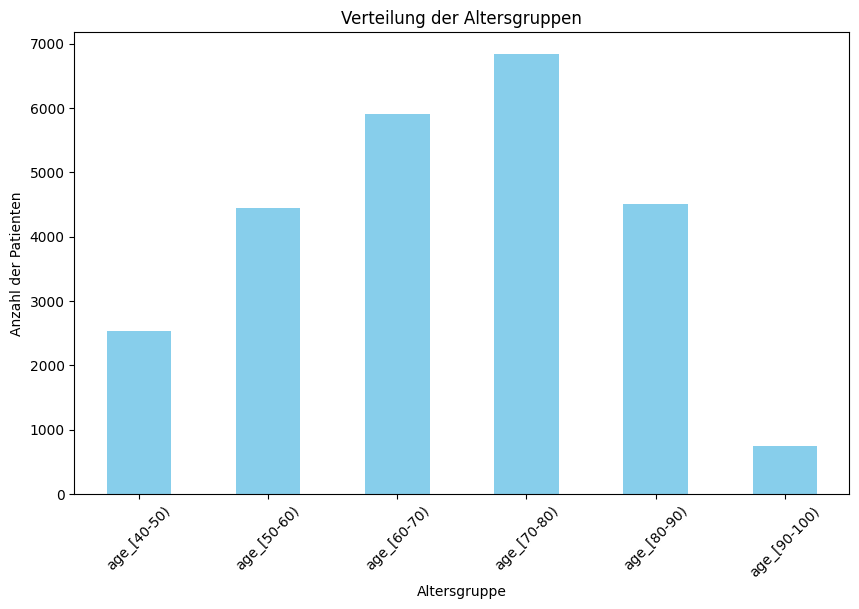

In [8]:
# Altersgruppen-Spalten
age_columns = ['age_[40-50)', 'age_[50-60)', 'age_[60-70)', 'age_[70-80)', 'age_[80-90)', 'age_[90-100)']

# Zählen der Vorkommen jeder Altersgruppe
age_counts = data[age_columns].sum()

# Erstellen des Balkendiagramms
plt.figure(figsize=(10, 6))
age_counts.plot(kind='bar', color='skyblue')
plt.title('Verteilung der Altersgruppen')
plt.xlabel('Altersgruppe')
plt.ylabel('Anzahl der Patienten')
plt.xticks(rotation=45)
plt.show()

### time_in_hospital

In [22]:
sorted_unique_values = data['time_in_hospital'].unique()
sorted_unique_values.sort()
print(sorted_unique_values)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14]


In [28]:
data['time_in_hospital'].describe()

count    25000.00000
mean         4.45332
std          3.00147
min          1.00000
25%          2.00000
50%          4.00000
75%          6.00000
max         14.00000
Name: time_in_hospital, dtype: float64

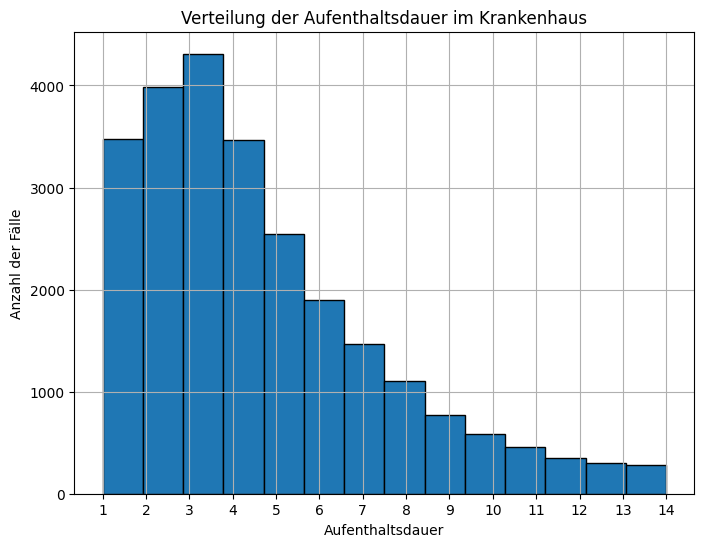

In [45]:
# Histogramm erstellen
plt.figure(figsize=(8, 6))
plt.hist(data['time_in_hospital'], bins=14, edgecolor='black')  # bins entsprechend der Anzahl der einzigartigen Werte in der Spalte
plt.title('Verteilung der Aufenthaltsdauer im Krankenhaus')
plt.xlabel('Aufenthaltsdauer')
plt.ylabel('Anzahl der Fälle')
plt.grid(True)
plt.xticks(np.arange(1, 15, step=1))  # Anpassen der x-Achsenbeschriftung je nach Wertebereich
plt.show()